In [1]:
%matplotlib notebook

In [2]:
# Close a hole in this notebook's Dockerfile

import sys
!{sys.executable} -m pip install torchmetrics

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time

import warnings

In [4]:
from pacsmodeling import (
    PACSDatasetMultipleDomain, PACSDatasetSingleDomain,
    PACSSamplerSingleDomainPerBatch
)

In [5]:
def plot_n_images_from_domain(domain, n, display_lag, data_type=int, start_index=0):
    fig, ax = plt.subplots()

    plt.ion()
    plt.show()
    for i in range(start_index, start_index + n): 
        x,y = domain[i]
        im_to_show = np.transpose(x.astype(data_type), (1,2,0))
        ax.imshow(im_to_show)  # plot the figure
        plt.gcf().canvas.draw()
        time.sleep(display_lag)

In [6]:
mix_dom = PACSDatasetMultipleDomain(
    "art_painting", "train", normalize=False
)

<IPython.core.display.Javascript object>


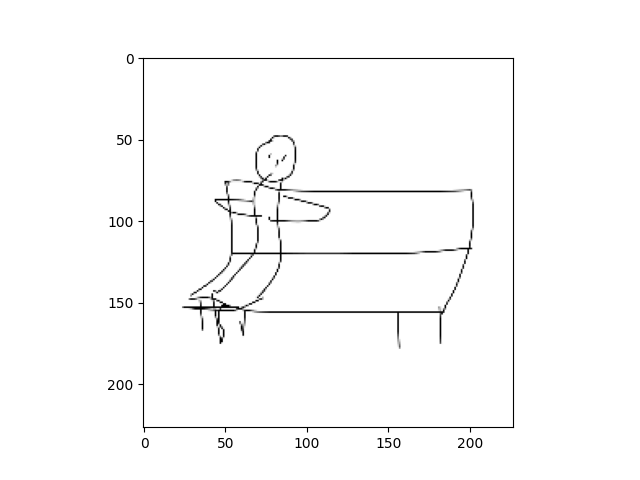

In [7]:
plot_n_images_from_domain(mix_dom, 1, 0.25, int, 7000)

### Sanity check the split indices, domain names, and split name properties.

In [8]:
mix_dom.split_indices

[2107, 3606, 7137]

In [9]:
mix_dom.domain_names

['cartoon', 'photo', 'sketch']

In [10]:
mix_dom.split_name

'train'

## Sampler Testing

In [11]:
from torch.utils.data import (
    Sampler, SequentialSampler, BatchSampler
)

In [12]:
seq = SequentialSampler(
    np.arange(50)
)

In [13]:
bs = BatchSampler(seq, 32, True)

In [17]:
mix_dom.split_indices

[2107, 3606, 7137]

In [14]:
PS = PACSSamplerSingleDomainPerBatch(
    mix_dom, 32, False
)

In [15]:
PSI = iter(PS)

In [16]:
for idx in PSI:
    print(idx)

tensor([2858, 2732, 3065, 3588, 2794, 3173, 3219, 3367, 2228, 3296, 2635, 3558,
        3092, 3312, 3348, 3158, 3586, 2755, 2848, 2366, 3227, 3225, 2851, 3218,
        2963, 2989, 3315, 3258, 2424, 2493, 2316, 2423])
tensor([ 989, 1653, 1136,  861, 1014, 1364,  911,  922,  375,   52, 1677,  282,
        1811,  474,  331,   12, 2020, 1309, 1138,  385,  350, 1397, 1693,  531,
        1074,  624, 1460, 1005, 1539,  504, 1108,  823])
tensor([   2,  347, 1538, 1894,  723, 1809, 2063, 1749, 1244, 1835, 1041,   58,
        1791,  598,   99, 1160, 1743,  751,  611,  795, 1813,  613, 1443,  484,
        1477, 1097,  178, 1455,  255, 1290, 1637,  810])
tensor([5669, 5524, 5717, 6551, 6596, 4718, 6306, 6534, 5365, 6117, 4115, 5064,
        5052, 6718, 3967, 4278, 5813, 5442, 5583, 5415, 6227, 3922, 3713, 5512,
        4666, 4781, 6815, 5601, 4999, 3813, 4096, 6199])
tensor([5833, 5270, 3818, 6351, 4469, 6052, 5518, 7068, 5697, 5608, 5253, 6353,
        6619, 6013, 6666, 5733, 6310, 4229, 6338, 58